In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
before = pd.read_csv("./Before.csv",delimiter=",",usecols=[9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66])
after = pd.read_csv("./After.csv",delimiter=",",usecols=[9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66])

In [116]:
after["Scary----Fun"][5] = 3

/var/folders/5q/mny3pg2n7h5g21h3v32rfj9wpykqrf/T/ipykernel_54488/3250047254.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0,8), fontsize=20)


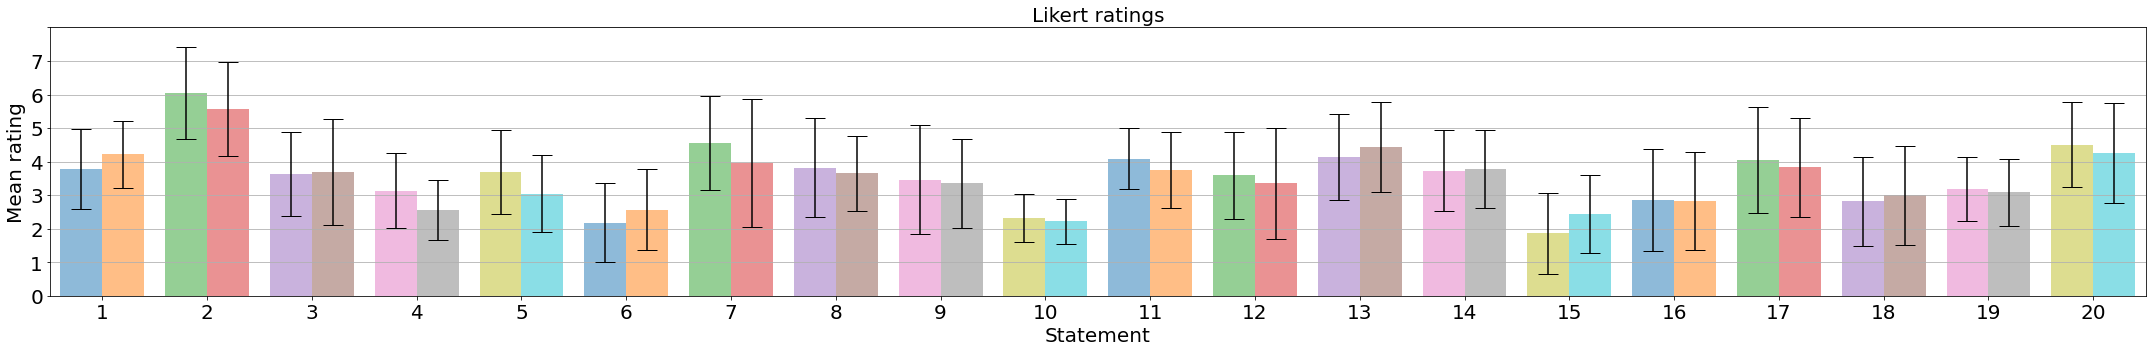

In [185]:
# Build the plot
fig, ax = plt.subplots(figsize=(30,5))

def reverse_scale(x):
    return 7-x


for index,column in enumerate(before):
    if index in [0,2,5,6,8,10,11,13,14,17]:
        before[column].astype(int).apply(reverse_scale)
        after[column].astype(int).apply(reverse_scale)
    before_mean = before[column].astype(int).mean()
    before_std = before[column].astype(int).std()
    ax.bar(index*2-0.8, before_mean, yerr=before_std, align='edge', alpha=0.5, ecolor='black', capsize=10)
    after_mean = after[column].astype(int).mean()
    after_std = after[column].astype(int).std()
    ax.bar(index*2, after_mean, yerr=after_std, align='edge', alpha=0.5, ecolor='black', capsize=10)
    
ax.set_ylabel('Mean rating',fontsize=20)
ax.set_xlabel('Statement',fontsize=20)
ax.set_xticks(np.arange(20)*2)
ax.set_xticklabels(np.arange(20)+1, fontsize=20)
ax.set_yticklabels(np.arange(0,8), fontsize=20)
ax.set_xlim([-1,39])
ax.set_ylim([0,8])

ax.yaxis.grid(True)
plt.title("Likert ratings",fontsize=20)
    
# Save the figure and show
plt.tight_layout()
plt.savefig('Likert_analysis_means.png')
plt.show()

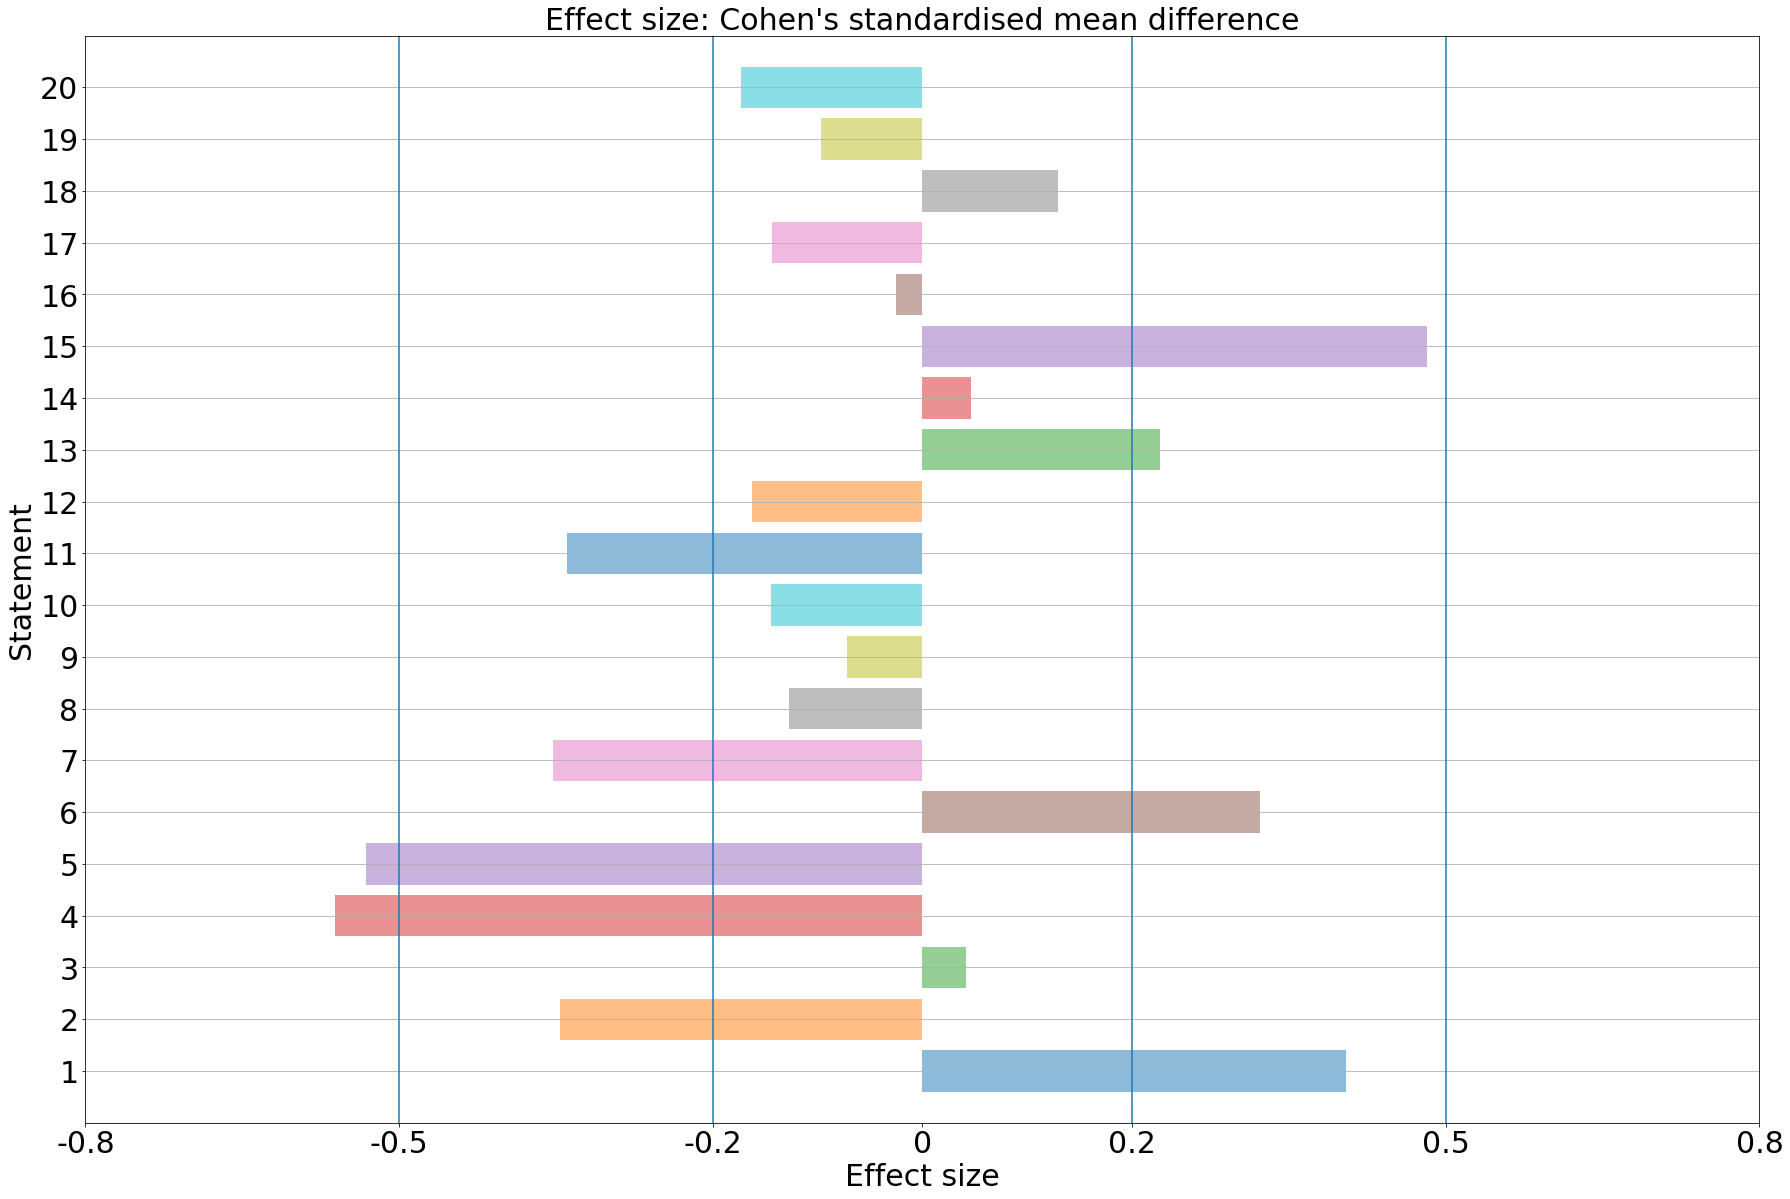

In [186]:
# see https://www.polyu.edu.hk/mm/effectsizefaqs/effect_size_equations2.html
# Build the plot
fig, ax = plt.subplots(figsize=(30,20))

def reverse_scale(x):
    return 7-x


for index,column in enumerate(before):
    if index in [0,2,5,6,8,10,11,13,14,17]:
        before[column].astype(int).apply(reverse_scale)
        after[column].astype(int).apply(reverse_scale)
    before_mean = before[column].astype(int).mean()
    before_std = before[column].astype(int).std()
    after_mean = after[column].astype(int).mean()
    after_std = after[column].astype(int).std()
    pooled_std = np.sqrt(((before_std**2) + (after_std**2))/2)
    ax.barh(index+1, (after_mean-before_mean)/pooled_std, align='center', alpha=0.5, ecolor='black', capsize=10)
    
ax.set_ylabel('Statement',fontsize=30)
ax.set_xlabel('Effect size',fontsize=30)
ax.set_xticks([-1,-0.8,-0.5,-0.2,0,0.2,0.5,0.8,1])
ax.set_xlim([-0.8,0.8])
ax.set_ylim([0,21])
ax.set_xticklabels([-1,-0.8,-0.5,-0.2,0,0.2,0.5,0.8,1], fontsize=30)
ax.set_yticks(np.arange(1,21))
ax.set_yticklabels(np.arange(1,21), fontsize=30)
ax.vlines([0.2,0.5,-0.2,-0.5],0,21)
plt.title("Effect size: Cohen's standardised mean difference",fontsize=30)

ax.yaxis.grid(True)
    
# Save the figure and show
#plt.tight_layout()
plt.savefig('Likert_analysis_effects.png')
plt.show()